Importing Required Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing The Data

In [ ]:
data = np.load('/content/drive/MyDrive/ORL_faces.npz')


In [ ]:
data

NpzFile '/content/drive/MyDrive/ORL_faces.npz' with keys: testY, testX, trainX, trainY

In [ ]:
train_images = data['trainX']
train_labels = data['trainY']
test_images = data['testX']
test_labels = data['testY']


In [ ]:
# Reshape the images to 2D (92x112)
train_images = train_images.reshape(-1, 112, 92)
test_images = test_images.reshape(-1, 112, 92)

Visualizing Data

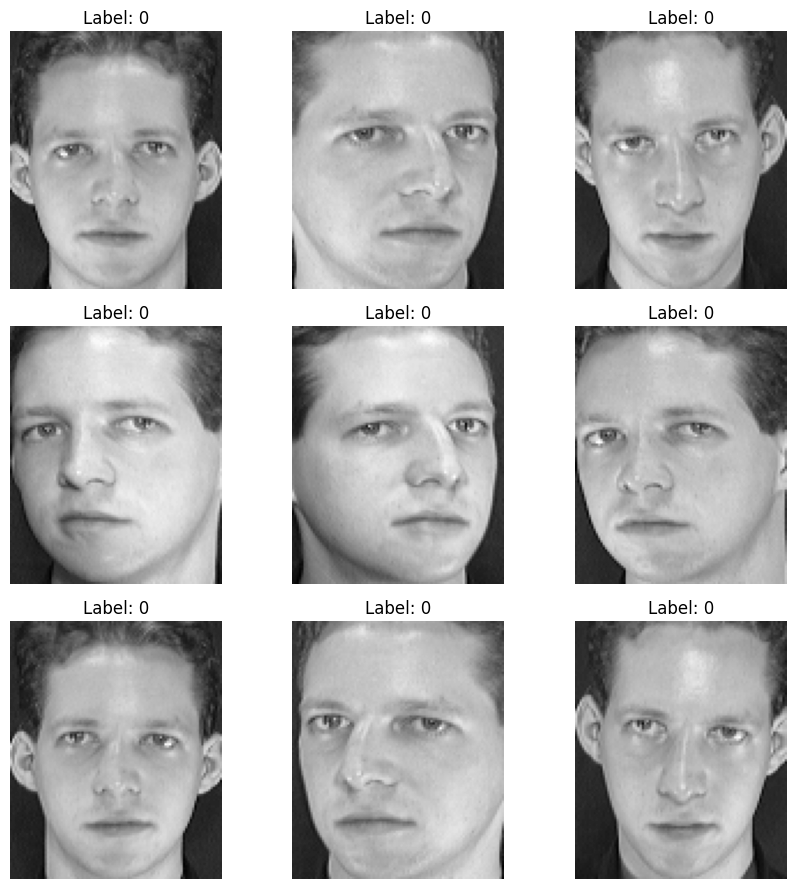

In [ ]:
#Define a function to plot images
def plot_images(images, labels, num_images=9):
    plt.figure(figsize=(9, 9))
    for i in range(num_images):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# Plot some training images
plot_images(train_images, train_labels)

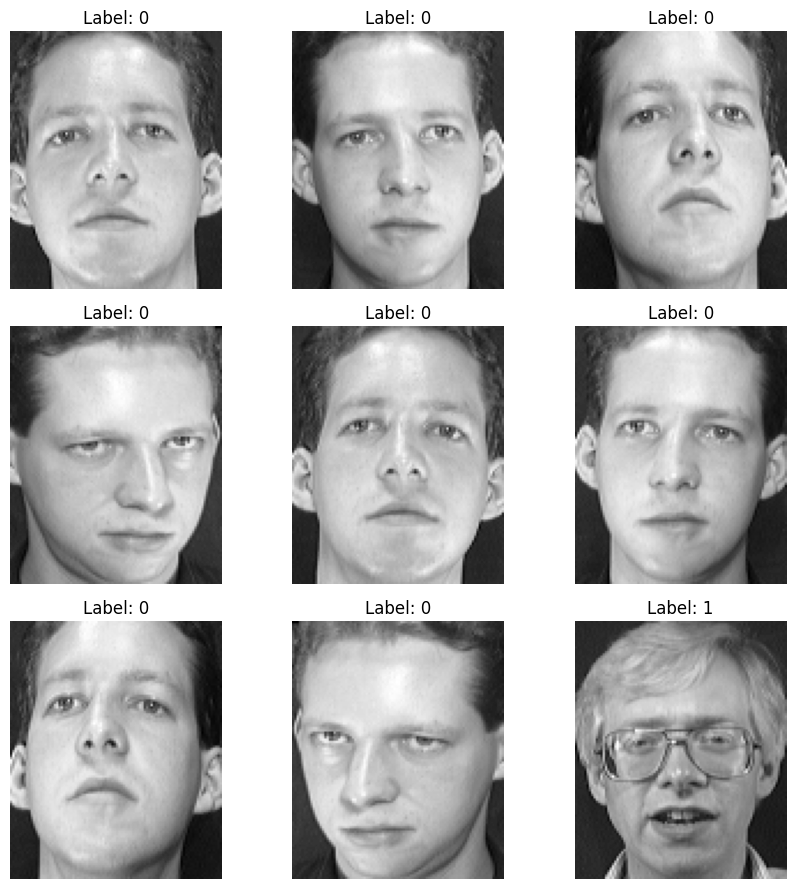

In [ ]:
plot_images(test_images, test_labels)

Preprocessing

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2


Converting grayscale image to RGB image because VGG16 model take only color image andalso resizing it into (224,244,3).

In [ ]:
def preprocess_images(images):
    preprocessed_images = []
    for img in images:
        # Convert the image to uint8 if it's not already
        if img.dtype != np.uint8:
            img = (img * 255).astype(np.uint8)  # Rescale and convert to uint8

        img = cv2.resize(img, (224, 224))  # Resize to 224x224
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # Convert grayscale to RGB
        img = tf.keras.applications.vgg16.preprocess_input(img)  # Preprocess for VGG16
        preprocessed_images.append(img)

    return np.array(preprocessed_images)

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

Normalizing

In [ ]:
train_images= train_images/255.0
test_images= test_images/255.0

In [ ]:
test_images[0]

array([[[0.43553331, 0.38518038, 0.35811764],
        [0.43161175, 0.38125882, 0.35419607],
        [0.4237686 , 0.37341568, 0.34635293],
        ...,
        [0.40808234, 0.3577294 , 0.33066666],
        [0.40416077, 0.35380784, 0.3267451 ],
        [0.40416077, 0.35380784, 0.3267451 ]],

       [[0.43161175, 0.38125882, 0.35419607],
        [0.43161175, 0.38125882, 0.35419607],
        [0.4237686 , 0.37341568, 0.34635293],
        ...,
        [0.40808234, 0.3577294 , 0.33066666],
        [0.40808234, 0.3577294 , 0.33066666],
        [0.40808234, 0.3577294 , 0.33066666]],

       [[0.42769018, 0.37733725, 0.3502745 ],
        [0.42769018, 0.37733725, 0.3502745 ],
        [0.4237686 , 0.37341568, 0.34635293],
        ...,
        [0.40808234, 0.3577294 , 0.33066666],
        [0.4120039 , 0.36165097, 0.33458823],
        [0.4120039 , 0.36165097, 0.33458823]],

       ...,

       [[0.41984704, 0.3694941 , 0.34243137],
        [0.41984704, 0.3694941 , 0.34243137],
        [0.4237686 , 0

In [ ]:
# print number of images in train and test
print(f'Number of images in train: {len(train_images)}')
print(f'Number of images in test: {len(test_images)}')

Number of images in train: 240
Number of images in test: 160


In [ ]:
# print label information shape
print(f'Train labels shape: {train_labels.shape}')
print(f'Train labels: {train_labels}')
print(f'Test labels: {test_labels}')

Train labels shape: (240,)
Train labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15
 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19 19]
Test labels: [ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8

In [ ]:
# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
train_labels = label_binarizer.fit_transform(train_labels)
test_labels = label_binarizer.transform(test_labels)

In [ ]:
print(train_labels)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [ ]:
print(test_labels)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [ ]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

In [ ]:
X_train[0].shape

(224, 224, 3)

Importing the pretrained VGG16 model as base model

In [ ]:
base_model= tf.keras.applications.VGG16(include_top=False,
                                               weights="imagenet",
                                               input_tensor=None,
                                               input_shape = X_train[0].shape,
                                               pooling=None,
                                               classes=1000,
                                               classifier_activation="softmax",)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable= False

Fine Tuning the base model

In [ ]:
for layer in base_model.layers[-4:]:  # Unfreeze the last 4 layers
    layer.trainable = True

In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Creating the Fully Connected layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import InputLayer,Flatten
# Build the CNN model
model = Sequential([
    InputLayer(input_shape=(224,224,3)),
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(20, activation='softmax')  # 20 classes for 20 subjects
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │           2,580 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,631,060 (105.40 MB)

 Trainable params: 19,994,516 (76.27 MB)

 Non-trainable params: 7,636,544 (29.13 MB)

Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,  # Less aggressive rotation
    width_shift_range=0.1,  # Smaller shift ranges
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

Fitting the model

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=20),epochs=35,
                    validation_data=(X_val, y_val))


Epoch 1/35


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.0636 - loss: 3.5893 - val_accuracy: 0.0278 - val_loss: 3.2805
Epoch 2/35
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 152ms/step - accuracy: 0.1863 - loss: 2.8309 - val_accuracy: 0.0694 - val_loss: 3.0509
Epoch 3/35
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.2458 - loss: 2.4146 - val_accuracy: 0.1250 - val_loss: 2.6394
Epoch 4/35
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.4086 - loss: 1.9318 - val_accuracy: 0.2222 - val_loss: 2.3300
Epoch 5/35
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.4631 - loss: 1.6799 - val_accuracy: 0.2778 - val_loss: 2.0752
Epoch 6/35
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.6115 - loss: 1.4078 - val_accuracy: 0.4583 - val_loss: 1.8132
Epoch 7/35
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.6420 - loss: 1.2710 - val_accuracy: 0.3750 - val_loss: 1.7330
Epoch 8/35
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.7140 - loss: 1.1673 - val_accuracy: 0.2778 - val_loss: 1.9086
Epoc

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

5/5 - 1s - 117ms/step - accuracy: 1.0000 - loss: 0.1385
Test accuracy: 1.0


In [ ]:
# Predict on test images
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


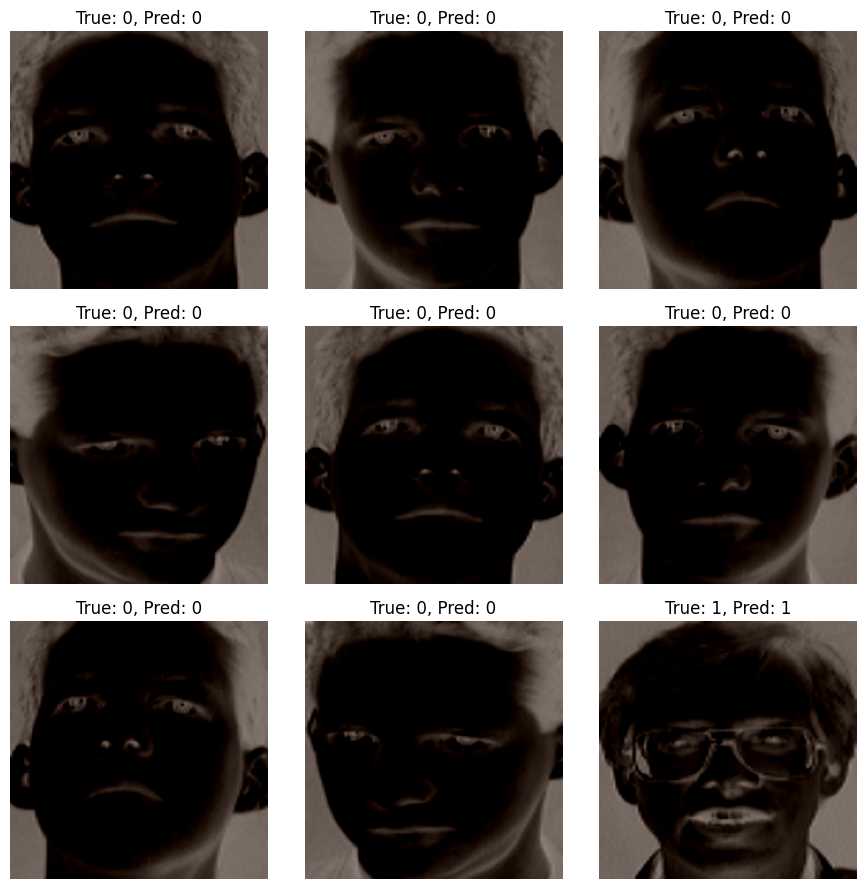

In [ ]:
# Visualize some test images with their predicted and true labels
def plot_predictions(images, true_labels, predicted_labels, num_images=9):
    plt.figure(figsize=(9, 9))
    for i in range(num_images):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].reshape(224, 224,3), cmap='gray')
        plt.title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


plot_predictions(test_images, true_classes, predicted_classes)

In [ ]:
# Plot training & validation accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')


    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')


    plt.show()

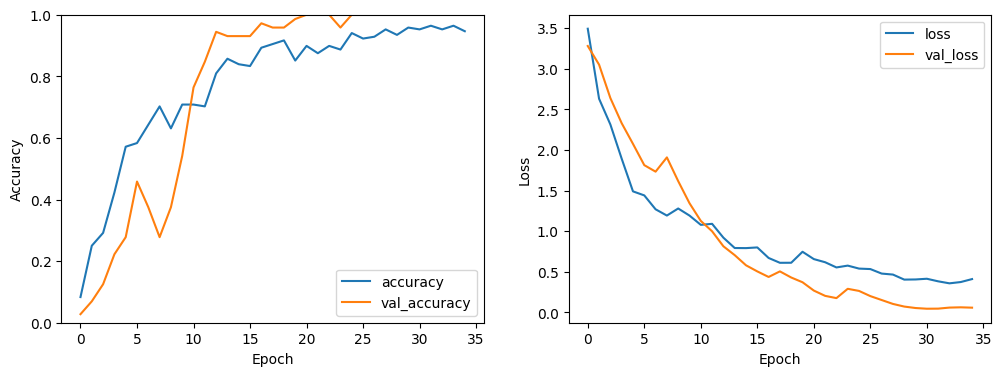

In [ ]:
plot_history(history)